<a href="https://colab.research.google.com/github/Medetkhan/DataScienceStudyProjects/blob/main/house_price_prediction_pet_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Проект 2 [Цена дома]

Вам предоставляется набор данных, содержащий информацию о домах и **ценах**. Набор данных уже разделен на ```train.csv``` и ```test.csv```. Файл ```data_description.txt``` содержит описание столбцов.

**Цель:** построить модели для прогнозирования цен на дома.

Пожалуйста, включите подробные объяснения следующих шагов:

1. Очистка, предварительная обработка данных

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик регрессии.

**Примечание:** вам **рекомендуется** искать другие алгоритмы машинного обучения в Интернете (не ограничиваясь материалом курса), но вы должны изучить и понять эти алгоритмы. Вы не можете удалить ни одну строку в файле test.csv.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def load_data(filename = None):
    from google.colab import drive
    drive.mount("/content/drive", force_remount=True)
    data = pd.read_csv(f"/content/drive/My Drive/AI_lessons/project-2/project-2/" + filename)
    return data

data_train = load_data("train.csv")
print(data_train.head)

Mounted at /content/drive
<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1030         160       RM         21.0     1680   Pave   NaN      Reg   
1      366          70       RM         59.0    10690   Pave   NaN      Reg   
2      883          60       RL          NaN     9636   Pave   NaN      IR1   
3       94         190  C (all)         60.0     7200   Pave   NaN      Reg   
4     1360          20       RL        129.0    16737   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1309   953          85       RL         60.0     7200   Pave   NaN      Reg   
1310   316          60       RL         71.0     7795   Pave   NaN      IR1   
1311   206          20       RL         99.0    11851   Pave   NaN      Reg   
1312   545          60       RL         58.0    17104   Pave   NaN      IR1   
1313  1240          20       RL         64.0     9037   Pave   NaN      IR1

In [ ]:
data_test = load_data("test.csv")
print(data_test.head)

Mounted at /content/drive
<bound method NDFrame.head of        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1227          60       RL         86.0    14598   Pave   NaN      IR1   
1     932          20       RL         70.0     9100   Pave   NaN      Reg   
2     647          20       RL         60.0     7200   Pave   NaN      Reg   
3     547          50       RL         70.0     8737   Pave   NaN      IR1   
4     812         120       RM          NaN     4438   Pave   NaN      Reg   
..    ...         ...      ...          ...      ...    ...   ...      ...   
141   452          20       RL         62.0    70761   Pave   NaN      IR1   
142  1168          60       RL         58.0    10852   Pave   NaN      IR1   
143   641         120       RL         62.0    12677   Pave   NaN      IR1   
144    93          30       RL         80.0    13360   Pave  Grvl      IR1   
145  1042          60       RL          NaN     9130   Pave   NaN      Reg   

    Lan

In [ ]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1030,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,118000
1,366,70,RM,59.0,10690,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,147000
2,883,60,RL,NaN,9636,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,178000
3,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
4,1360,20,RL,129.0,16737,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,315000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,953,85,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,133900
1310,316,60,RL,71.0,7795,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,188500
1311,206,20,RL,99.0,11851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,180500
1312,545,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,179665


In [ ]:
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,214000
1,932,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,117500
2,647,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,98300
3,547,50,RL,70.0,8737,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,210000
4,812,120,RM,NaN,4438,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,ConLD,Normal,144500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
142,1168,60,RL,58.0,10852,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Normal,173000
143,641,120,RL,62.0,12677,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,274000
144,93,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,163500


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1314 non-null   int64  
 1   MSSubClass     1314 non-null   int64  
 2   MSZoning       1314 non-null   object 
 3   LotFrontage    1078 non-null   float64
 4   LotArea        1314 non-null   int64  
 5   Street         1314 non-null   object 
 6   Alley          83 non-null     object 
 7   LotShape       1314 non-null   object 
 8   LandContour    1314 non-null   object 
 9   Utilities      1314 non-null   object 
 10  LotConfig      1314 non-null   object 
 11  LandSlope      1314 non-null   object 
 12  Neighborhood   1314 non-null   object 
 13  Condition1     1314 non-null   object 
 14  Condition2     1314 non-null   object 
 15  BldgType       1314 non-null   object 
 16  HouseStyle     1314 non-null   object 
 17  OverallQual    1314 non-null   int64  
 18  OverallC

In [ ]:
# Проверим, есть ли пропущенные значения
data_train.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,236
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
data_test.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,23
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
#список всех колонок где есть нулевые ячейки (пропущенные значения)
any_nan_list_train = data_train.columns[data_train.isnull().any()]
any_nan_list_train
#print(data.columns[data.isnull().any()])

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
#список всех колонок где есть нулевые ячейки (пропущенные значения)
any_nan_list_test = data_test.columns[data_test.isnull().any()]
any_nan_list_test
#print(data.columns[data.isnull().any()])

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [ ]:
#посмотрим сколько пропущенных значений в каждом из этих колонок из списка any_nan_list
data_train[any_nan_list_train].isnull().sum()


,0
LotFrontage,236
Alley,1231
MasVnrType,788
MasVnrArea,7
BsmtQual,31
BsmtCond,31
BsmtExposure,32
BsmtFinType1,31
BsmtFinType2,32
Electrical,1


In [ ]:
#посмотрим сколько пропущенных значений в каждом из этих колонок из списка any_nan_list
data_test[any_nan_list_test].isnull().sum()

,0
LotFrontage,23
Alley,138
MasVnrType,84
MasVnrArea,1
BsmtQual,6
BsmtCond,6
BsmtExposure,6
BsmtFinType1,6
BsmtFinType2,6
FireplaceQu,69


In [ ]:
df_train = data_train.drop(['Id'], axis=1)
df_test = data_test.drop(['Id'], axis=1)


#GPT пишет что чтобы понять какие колонки можно просто удалить, а над каким поработать чтобы заполнить надо увидеть процент заполненности. если путых значений больше чем 40-50% то можно удалить
# Рассчитаем процент пропущенных значений для каждой колонки из списка any_nan_list

In [ ]:
# Рассчитываем процент пропусков для каждого признака
missing_data_train = df_train.isnull().mean() * 100
missing_data_train = missing_data_train[missing_data_train > 0].sort_values(ascending=False)
print(missing_data_train)


LotFrontage     17.960426
GarageType       5.936073
GarageYrBlt      5.936073
GarageFinish     5.936073
GarageQual       5.936073
GarageCond       5.936073
BsmtExposure     2.435312
BsmtFinType2     2.435312
BsmtQual         2.359209
BsmtCond         2.359209
BsmtFinType1     2.359209
MasVnrArea       0.532725
Electrical       0.076104
dtype: float64


In [ ]:
missing_data_test = df_test.isnull().mean() * 100
missing_data_test = missing_data_test[missing_data_test > 0].sort_values(ascending=False)
print(missing_data_test)


LotFrontage     15.753425
BsmtQual         4.109589
BsmtCond         4.109589
BsmtExposure     4.109589
BsmtFinType1     4.109589
BsmtFinType2     4.109589
GarageType       2.054795
GarageYrBlt      2.054795
GarageFinish     2.054795
GarageQual       2.054795
GarageCond       2.054795
MasVnrArea       0.684932
dtype: float64


In [ ]:
# Удалим признаки с более чем 40% пропусков
threshold = 0.4  # 40% порог
columns_to_drop_train = missing_data_train[missing_data_train > threshold * 100].index.tolist()

# Удаление колонок с большим количеством пропусков
df_train = df_train.drop(columns=columns_to_drop_train)
print(f'Удалены колонки: {columns_to_drop_train}')


Удалены колонки: []


In [ ]:
columns_to_drop_test = missing_data_test[missing_data_test > threshold * 100].index.tolist()

# Удаление колонок с большим количеством пропусков
df_test = df_test.drop(columns=columns_to_drop_test)
print(f'Удалены колонки: {columns_to_drop_test}')

Удалены колонки: []


In [ ]:
# Проверим наличие дубликатов
duplicates = df_test.duplicated()

# Считаем количество дубликатов
num_duplicates = duplicates.sum()

# Выводим количество дубликатов
print(f"Количество дубликатов: {num_duplicates}")

Количество дубликатов: 0


In [ ]:
# разделим на числовые и категориальные колонки
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(numeric_columns)
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SalePrice'],
      dtype='object')
Index([], dtype='object')


Проверим есть ли числовые данные среди категориальных, которые неправильно репрезентованы просто

In [ ]:
# Создаем пустой список для хранения колонок, которые нужно проверить
non_numeric_in_categories = []

for col in categorical_columns:
    # Попробуем преобразовать колонку в числовой формат
    numeric_conversion = pd.to_numeric(df_train[col], errors='coerce')

    # Проверим, сколько значений стало NaN
    num_nans = numeric_conversion.isnull().sum()

    # Если NaN меньше общего количества строк, значит есть числовые значения
    if num_nans < len(df_train):
        non_numeric_in_categories.append(col)

# Выводим колонки, которые содержат числовые значения
print("Категориальные колонки с числовыми значениями:", non_numeric_in_categories)


Категориальные колонки с числовыми значениями: []


let's work on numeric columns first

In [ ]:
# Корреляционная матрица для числовых признаков
corr_matrix = df_train[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Numeric Features")
plt.show()

ValueError: could not convert string to float: 'BrDale'

In [ ]:
# Корреляция с таргет-переменной (например, 'target')
target_corr = df_train[numeric_columns].corrwith(df_train['SalePrice'])

# Отфильтруем признаки с низкой корреляцией (например, < 0.1)
low_corr_features = target_corr[target_corr.abs() < 0.1].index.tolist()
print(f'Признаки с низкой корреляцией: {low_corr_features}')

# Удаление этих признаков
df_train.drop(columns=low_corr_features, inplace=True)
df_test.drop(columns=low_corr_features, inplace=True)


In [ ]:
len(numeric_columns)


In [ ]:
numeric_columns = df_train.select_dtypes(include=[np.number]).columns
len(numeric_columns)

37

In [ ]:
import matplotlib.pyplot as plt

# Построение гистограмм для каждой числовой колонки
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'Гистограмма для {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()


In [ ]:
# Создаем список колонок из numeric_columns, в которых есть пропуски (NaN)
numeric_columns_with_nan = [col for col in numeric_columns if data[col].isnull().any()]

# Выводим список колонок с пропусками
print(numeric_columns_with_nan)


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [ ]:
# Создаем список колонок из numeric_columns, в которых есть пропуски (NaN)
numeric_columns_with_nan_test = [col for col in numeric_columns if data_test[col].isnull().any()]

# Выводим список колонок с пропусками
print(numeric_columns_with_nan_test)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [ ]:
# Рассчитываем процент пропущенных значений для колонок из numeric_columns_with_nan
missing_data_numeric = df_train[numeric_columns_with_nan].isnull().mean() * 100
missing_data_numeric

,0
LotFrontage,17.960426
MasVnrArea,0.532725
GarageYrBlt,5.936073


In [ ]:
#создадим список только из названия колонок missing_data_numeric
missing_data_numeric = missing_data_numeric.index.tolist()
missing_data_numeric


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

чтобы понять чем заполнить Nan в этих трех колонках числовых missing_data_numeric рекомендуется посмотреть распределение. если нормальное - то заполнить медианой


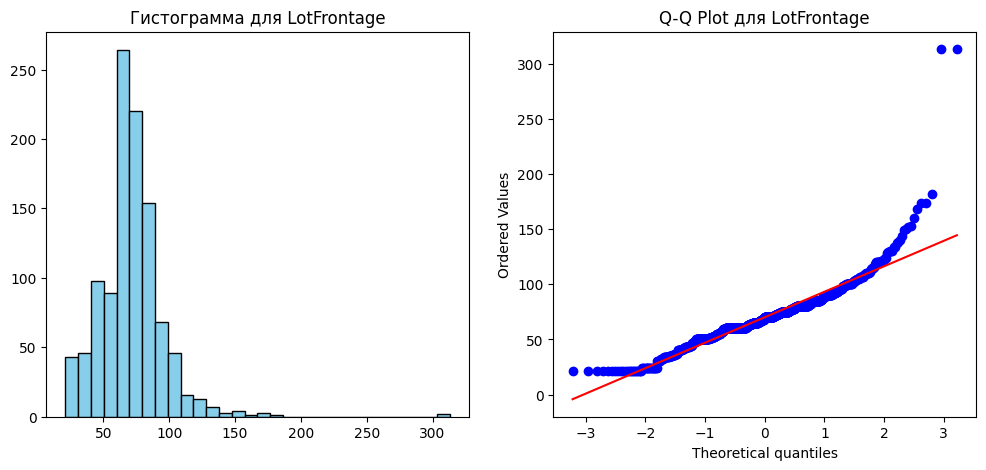

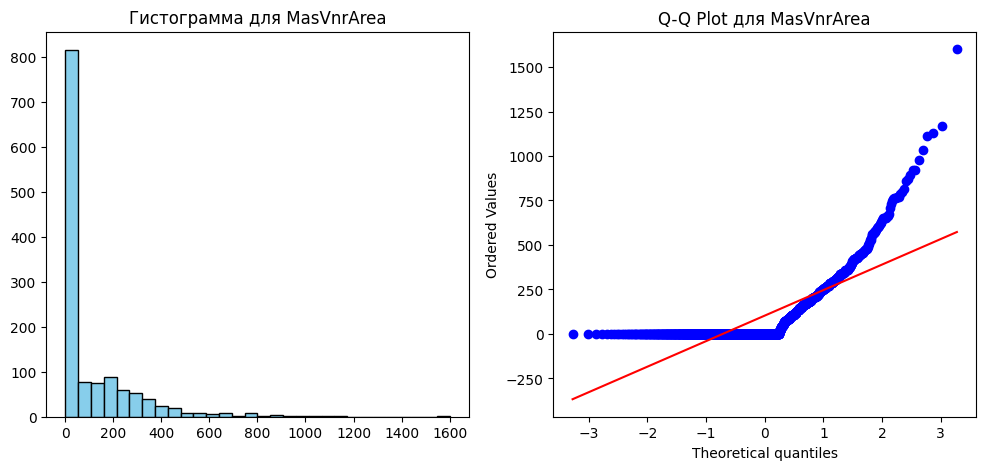

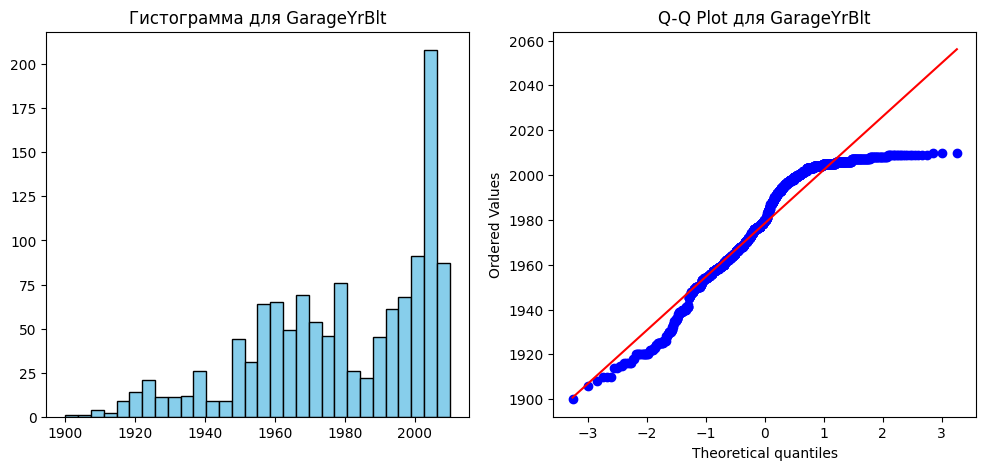

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Построение гистограмм и Q-Q графиков для каждой колонки из missing_data_numeric
for column in missing_data_numeric:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Гистограмма
    axs[0].hist(df_train[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    axs[0].set_title(f'Гистограмма для {column}')

    # Q-Q график
    stats.probplot(df_train[column].dropna(), dist="norm", plot=axs[1])
    axs[1].set_title(f'Q-Q Plot для {column}')

    plt.show()


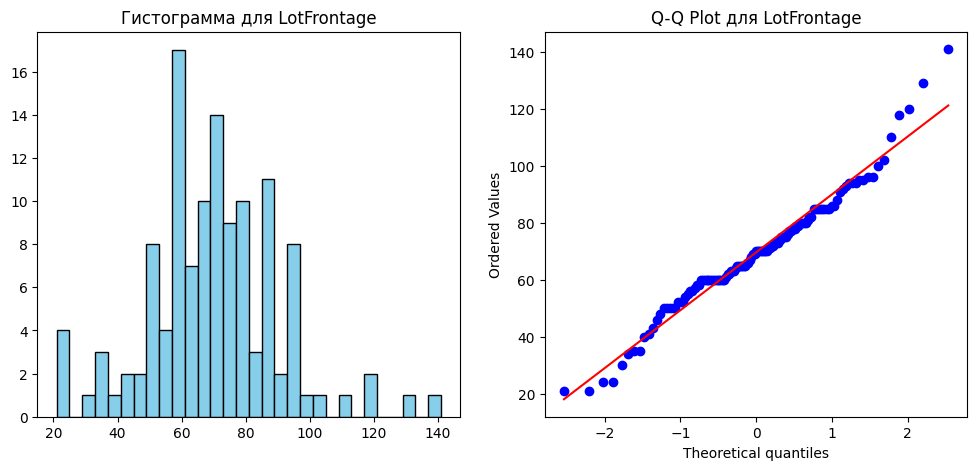

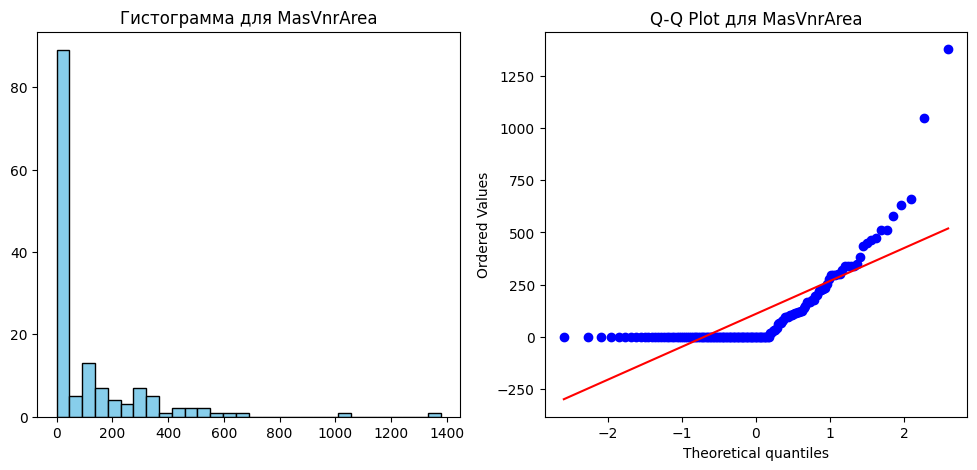

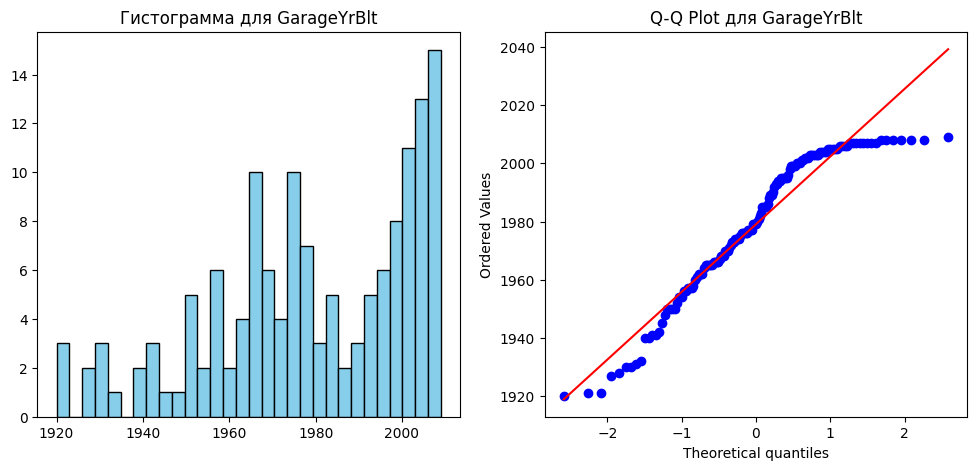

In [ ]:
#Построение гистограмм и Q-Q графиков для каждой колонки из missing_data_numeric
for column in missing_data_numeric:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Гистограмма
    axs[0].hist(df_test[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    axs[0].set_title(f'Гистограмма для {column}')

    # Q-Q график
    stats.probplot(df_test[column].dropna(), dist="norm", plot=axs[1])
    axs[1].set_title(f'Q-Q Plot для {column}')

    plt.show()

Для LotFrontage можно среднее значение, а для GarageYrBlt andMasVnrArea - mediana

In [ ]:
# Заполнение пропущенных значений в LotFrontage средним значением
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

# Заполнение пропущенных значений в GarageYrBlt медианой
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median())

# Заполнение пропущенных значений в MasVnrArea медианой
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].median())


In [ ]:
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

# Заполнение пропущенных значений в GarageYrBlt медианой
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median())

# Заполнение пропущенных значений в MasVnrArea медианой
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].median())

перепроверим Наны в числовых колонках

In [ ]:
# Проверка на наличие пропусков в числовых колонках
missing_numeric = df_test.select_dtypes(include=['number']).isnull().sum()
missing_numeric = missing_numeric[missing_numeric > 0]

# Выводим результат
if missing_numeric.empty:
    print("Нет пропусков в числовых колонках.")
else:
    print("Есть пропуски в следующих числовых колонках:")
    print(missing_numeric)


Нет пропусков в числовых колонках.


let;s work with categorical columns now:

In [ ]:
# Проверка на пропуски в категориальных колонках
missing_categorical = df_train.select_dtypes(include=['object']).isnull().sum()
missing_categorical = missing_categorical[missing_categorical > 0]

if missing_categorical.empty:
    print("Нет пропусков в категориальных колонках.")
else:
    print("Есть пропуски в следующих категориальных колонках:")
    print(missing_categorical)


Есть пропуски в следующих категориальных колонках:
BsmtQual        31
BsmtCond        31
BsmtExposure    32
BsmtFinType1    31
BsmtFinType2    32
Electrical       1
GarageType      78
GarageFinish    78
GarageQual      78
GarageCond      78
dtype: int64


In [ ]:
#let's see unique values of the column "ELectrical"

df_train['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseF', 'FuseP', nan, 'Mix'], dtype=object)

In [ ]:
df_test['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseF'], dtype=object)

In [ ]:
df_train['GarageType'].unique()

array(['Detchd', 'BuiltIn', 'Attchd', nan, 'Basment', 'CarPort', '2Types'],
      dtype=object)

In [ ]:
df_test['GarageType'].unique()

array(['BuiltIn', 'Detchd', 'Attchd', nan, 'Basment'], dtype=object)

In [ ]:
#let's fill nan value of the column 'Electrical' by mode:
df_train['Electrical'].fillna(df_train['Electrical'].mode()[0], inplace=True)
df_test['Electrical'].fillna(df_test['Electrical'].mode()[0], inplace=True)

в колонках про гараж и подвал заполним пропуски значением None так как скорее всего это означает отсутствие

In [ ]:
# Колонки, где отсутствие объекта указывается значением "None"
cols_2fil_with_None = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'
]

# Заполняем пропуски значением "None" в указанных колонках
df_train[cols_2fil_with_None] = df_train[cols_2fil_with_None].fillna("None")
df_test[cols_2fil_with_None] = df_test[cols_2fil_with_None].fillna("None")

Еще раз проверим все пропуски в категориальных колонках

In [ ]:
# Проверка на пропуски в категориальных колонках
missing_categorical = df_train.select_dtypes(include=['object']).isnull().sum()
missing_categorical = missing_categorical[missing_categorical > 0]

if missing_categorical.empty:
    print("Нет пропусков в категориальных колонках.")
else:
    print("Есть пропуски в следующих категориальных колонках:")
    print(missing_categorical)

Нет пропусков в категориальных колонках.


In [ ]:
missing_categorical_test = df_test.select_dtypes(include=['object']).isnull().sum()
missing_categorical_test = missing_categorical_test[missing_categorical_test > 0]

if missing_categorical_test.empty:
    print("Нет пропусков в категориальных колонках.")
else:
    print("Есть пропуски в следующих категориальных колонках:")
    print(missing_categorical_test)

Нет пропусков в категориальных колонках.


проверим пропуски во всех колонказ датафрейма df

In [ ]:
# Проверка на наличие пропусков в DataFrame
missing_columns = df_test.columns[df_test.isnull().any()]

if len(missing_columns) > 0:
    print("Столбцы с пропусками:", missing_columns.tolist())
else:
    print("Все ок, пропусков нет.")


Все ок, пропусков нет.


Разделим категории на две группы:

Категории с небольшим количеством уникальных значений (для One-Hot Encoding).
Категории с большим количеством уникальных значений или порядковыми данными (для Label Encoding или других методов).

In [ ]:
# Определение количества уникальных значений для каждой категориальной колонки
unique_values = {col: df_train[col].nunique() for col in df_train.select_dtypes(include=['object']).columns}
print("Количество уникальных значений в категориальных колонках:")
for col, count in unique_values.items():
    print(f"{col}: {count}")


Количество уникальных значений в категориальных колонках:
Exterior2nd: 16


Шаг 2: Разделение колонок для кодирования
Предположим:

Если колонка имеет менее 10 уникальных значений, она будет закодирована с помощью One-Hot Encoding.
Если колонка имеет 10 и более уникальных значений, будет использован Label Encoding.

In [ ]:
# Разделение колонок по количеству уникальных значений
one_hot_columns = [col for col, count in unique_values.items() if count < 10]
label_encode_columns = [col for col, count in unique_values.items() if count >= 10]

print("Колонки для One-Hot Encoding:", one_hot_columns)
print("Колонки для Label Encoding:", label_encode_columns)


Колонки для One-Hot Encoding: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Колонки для Label Encoding: ['Neighborhood', 'Exterior1st', 'Exterior2nd']


применим one hot encoder к колонкам из списка one_hot_columns

In [ ]:
for col in label_encode_columns:
    train_labels = set(df_train[col].unique())
    test_labels = set(df_test[col].unique())
    missing_labels = test_labels - train_labels
    if missing_labels:
        print(f"Column {col} has unseen labels in test set: {missing_labels}")


Column Exterior1st has unseen labels in test set: {'MetalSd', 'Wd Sdng', 'CemntBd', 'BrkFace', 'Plywood', 'Stucco', 'WdShing', 'HdBoard', 'AsphShn', 'VinylSd', 'BrkComm'}


In [ ]:
all_categories = set(df_train[col].unique()).union(set(df_test[col].unique()))
df_train[col] = pd.Categorical(df_train[col], categories=all_categories).codes
df_test[col] = pd.Categorical(df_test[col], categories=all_categories).codes


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
df_train_encoded = encoder.fit_transform(df_train[label_encode_columns])
df_test_encoded = encoder.transform(df_test[label_encode_columns])


In [ ]:
#let's list all categories from both datasets: df_train and df_test separately to see difference:

train_categories = set(df_train[col].unique())
test_categories = set(df_test[col].unique())
print("Categories in df_train:", train_categories)
print("Categories in df_test:", test_categories)

Categories in df_train: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Categories in df_test: {0, 1, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15}


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Combine unique categories from both train and test
all_categories = pd.concat([df_train, df_test])[label_encode_columns].stack().unique()

# Initialize and fit the LabelEncoder on all categories
label_encoder = LabelEncoder()
label_encoder.fit(all_categories)

# Transform train and test sets
for col in label_encode_columns:
    df_train[col] = label_encoder.transform(df_train[col])
    df_test[col] = label_encoder.transform(df_test[col])


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

GPT пишет что лучше использовать OneHot encoder в данном случае из за его способности обходить невидимые ранее лейблы. Using LabelEncoder with unseen categories (like 'AsphShn' appearing only in df_test) is challenging because LabelEncoder doesn’t support handling unknown labels by default.

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # One-Hot Encoding для колонок с малым числом уникальных значений
# df_train = pd.get_dummies(df_train, columns=one_hot_columns, drop_first=True)
# df_test = pd.get_dummies(df_test, columns=one_hot_columns, drop_first=True)

# # Label Encoding для колонок с большим числом уникальных значений
# label_encoder = LabelEncoder()
# for col in label_encode_columns:
#     df_train[col] = label_encoder.fit_transform(df_train[col])
#     df_test[col] = label_encoder.transform(df_test[col])

ValueError: y contains previously unseen labels: 'AsphShn'

Выведем список всех категориальных колонок, при наличии таковых. Если нет, то вывести "нет категориальных колонок"

In [ ]:
# Check categorical columns in the original DataFrames before encoding
train_categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns
if train_categorical_columns.empty:
    print("В df_train нет категориальных колонок")
else:
    print("Категориальные колонки в df_train:", list(train_categorical_columns))

test_categorical_columns = df_test.select_dtypes(include=['object', 'category']).columns
if test_categorical_columns.empty:
    print("В df_test нет категориальных колонок")
else:
    print("Категориальные колонки в df_test:", list(test_categorical_columns))



В df_train нет категориальных колонок
Категориальные колонки в df_test: ['Exterior1st']


теперь подготовка к обучению. разделим на тренировоч и тестовые данные

In [ ]:
from sklearn.model_selection import train_test_split

# Предположим, что у нас есть целевой признак 'target'
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


масштабирование (scaling) пока что пропустим, посмотрим насколько точна будет модель без скейлинга

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

забыл что это был train dataset let's do the same on test dataset

In [ ]:
test_data = load_data("test.csv")
print(test_data.head)